In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import numpy as np
import pandas as pd

from scipy.cluster import hierarchy
from scipy.spatial import distance

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style('whitegrid')
sns.set_palette('colorblind')
 
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [3]:
## New 
## Add by Jiaxin
OUTDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/notebooks/manuscript_figures/fig6_network_similarity'
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
SUPPOUTDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/notebooks/supp/supp_figs/'
    
WORKDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference'
os.chdir(WORKDIR)

In [2]:
OUTDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/Final_figures/figure_panels_Jan11'
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
WORKDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/'
os.chdir(WORKDIR)

In [4]:
## New
## Add by Jiaxin


import yaml
config = yaml.load(open('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/snakefiles/04_evaluation/fscore.yaml'),
                   Loader=yaml.FullLoader)

# Alphabetical order, except for Pearson at end
ALGORITHMS = sorted(config['algorithms'], key=lambda s: s.lower())
ALGORITHMS = [a for a in ALGORITHMS if a not in ['pearson', 'random']] + ['pearson']

# Grouped by species
DATASETS = [
    'gasch_GSE102475',
    'jackson_GSE125162',
    'sridharan_A2S',
    'sridharan_FBS',
    'zhao_GSE114952',
    'shalek_GSE48968',
    'han_GSE107552'
]

In [5]:
ALGORITHMS

['inferelator',
 'knnDREMI',
 'LEAP',
 'MERLIN',
 'PIDC',
 'SCENIC',
 'SCODE',
 'Scribe',
 'SILGGM',
 'pearson']

In [17]:
# Grouped by species
DATASETS = [
    'gasch_GSE102475',
    'jackson_GSE125162',
    'sridharan_A2S',
    'sridharan_FBS',
    'zhao_GSE114952',
    'shalek_GSE48968',
    'han_GSE107552'
]

In [4]:
alg_fix = {
    'inferelator': 'Inferelator',
    'knnDREMI': 'kNN-DREMI',
    'pearson': 'Pearson',
    'random': 'Random'
}

ALGORITHMS = [alg_fix.get(a, a) for a in ALGORITHMS]

In [7]:
ALGORITHMS

['Inferelator',
 'kNN-DREMI',
 'LEAP',
 'MERLIN',
 'PIDC',
 'SCENIC',
 'SCODE',
 'Scribe',
 'SILGGM',
 'Pearson']

In [3]:
ALGORITHMS = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI']


In [5]:
overlaps = pd.read_table("/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/algorithm_overlap/agg_edge_ovelap_Sep_29.txt")
overlaps.algA = overlaps.algA.replace(alg_fix)
overlaps.algB = overlaps.algB.replace(alg_fix)

overlaps = overlaps.loc[overlaps.algA.isin(ALGORITHMS) & overlaps.algB.isin(ALGORITHMS)]

In [6]:
pd.set_option("display.max_rows", None)

In [7]:
overlaps

dataset  top_n         algA         algB     nA     nB   sect  \
0       gasch_GSE102475    500      Pearson         LEAP    500    500    164   
1       gasch_GSE102475   5000      Pearson         LEAP   5000   5000   2653   
2       gasch_GSE102475  10000      Pearson         LEAP  10000  10000   4646   
3       gasch_GSE102475  50000      Pearson         LEAP  50000  50000  17287   
4       gasch_GSE102475    500      Pearson       SILGGM    500    500      4   
5       gasch_GSE102475   5000      Pearson       SILGGM   5000   5000     94   
6       gasch_GSE102475  10000      Pearson       SILGGM  10000  10000    372   
7       gasch_GSE102475  50000      Pearson       SILGGM  50000  50000  13056   
8       gasch_GSE102475    500      Pearson       MERLIN    500    500     56   
9       gasch_GSE102475   5000      Pearson       MERLIN   5000   5000   1454   
10      gasch_GSE102475  10000      Pearson       MERLIN  10000  10000   4099   
11      gasch_GSE102475  50000      Pearson       MERLIN  50000  50000  27370   
12      gasch_GSE102475    500      Pearson    kNN-DREMI    500    500     86   
13      gasch_GSE102475   5000      Pearson    kNN-DREMI   5000   5000    631   
14      gasch_GSE102475  10000      Pearson    kNN-DREMI  10000  10000   1190   
15      gasch_GSE102475  50000      Pearson    kNN-DREMI  50000  50000   8479   
16      gasch_GSE102475    500      Pearson       SCENIC    500    500    289   
17      gasch_GSE102475   5000      Pearson       SCENIC   5000   5000   2499   
18      gasch_GSE102475  10000      Pearson       SCENIC  10000  10000   4759   
19      gasch_GSE102475  50000      Pearson       SCENIC  50000  50000  24895   
20      gasch_GSE102475    500      Pearson  Inferelator    500    500     59   
21      gasch_GSE102475   5000      Pearson  Inferelator   5000   5000   1134   
22      gasch_GSE102475  10000      Pearson  Inferelator  10000  10000   3154   
23      gasch_GSE102475  50000      Pearson  Inferelator  50000  50000  21406   
24      gasch_GSE102475    500      Pearson         PIDC    500    500     56   
25      gasch_GSE102475   5000      Pearson         PIDC   5000   5000    836   
26      gasch_GSE102475  10000      Pearson         PIDC  10000  10000   1872   
27      gasch_GSE102475  50000      Pearson         PIDC  50000  50000  14010   
28      gasch_GSE102475    500      Pearson        SCODE    500    500      0   
29      gasch_GSE102475   5000      Pearson        SCODE   5000   5000    254   
30      gasch_GSE102475  10000      Pearson        SCODE  10000  10000    873   
31      gasch_GSE102475  50000      Pearson        SCODE  50000  50000   8702   
32      gasch_GSE102475    500      Pearson       Scribe    500    500      2   
33      gasch_GSE102475   5000      Pearson       Scribe   5000   5000    270   
34      gasch_GSE102475  10000      Pearson       Scribe  10000  10000    644   
35      gasch_GSE102475  50000      Pearson       Scribe  50000  50000   6081   
36      gasch_GSE102475    500         LEAP       SILGGM    500    500      5   
37      gasch_GSE102475   5000         LEAP       SILGGM   5000   5000     78   
38      gasch_GSE102475  10000         LEAP       SILGGM  10000  10000    252   
39      gasch_GSE102475  50000         LEAP       SILGGM  50000  50000   6914   
40      gasch_GSE102475    500         LEAP       MERLIN    500    500     55   
41      gasch_GSE102475   5000         LEAP       MERLIN   5000   5000    842   
42      gasch_GSE102475  10000         LEAP       MERLIN  10000  10000   1988   
43      gasch_GSE102475  50000         LEAP       MERLIN  50000  50000  12041   
44      gasch_GSE102475    500         LEAP    kNN-DREMI    500    500     90   
45      gasch_GSE102475   5000         LEAP    kNN-DREMI   5000   5000    549   
46      gasch_GSE102475  10000         LEAP    kNN-DREMI  10000  10000   1159   
47      gasch_GSE102475  50000         LEAP    kNN-DREMI  50000  50000   9491   
48      gasch_GSE102475    500         LEAP    

In [8]:
overlaps["top_n"] = overlaps["top_n"].astype(int)
overlaps["sect"] = overlaps["sect"].astype(int)
overlaps["jaccard"] = overlaps["jaccard"].astype(float)
overlaps["fscore"] = overlaps["fscore"].astype(float)

In [9]:
overlaps["k"] = overlaps["top_n"]

In [10]:
def add_colorbar(ax):
    """Add scaled colorbar that fits next to axis"""
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    PCM = ax.get_children()[0]
    plt.colorbar(PCM, cax=cax, orientation='vertical')

In [11]:
def make_hmap(dat, metric):
    """Make heatmap matrix from subset of overlaps table"""
    
    # Pivot out an alg-by-alg matrix, populated with similarity metric
    # Exclude random net 
    '''
    Jiaxin: Change the .loc() function to .reindex() [.loc is no longer supported by pandas]
    '''
    hmap = dat.pivot_table(index='algA', columns='algB', values=metric).reindex(index = ALGORITHMS,columns = ALGORITHMS)
    
    # Fill out our matrix symmetrically, since
    # the overlaps table only includes one direction
    hmap = pd.concat([hmap, hmap.T]).max(level=0)
        
    return hmap

In [12]:
def order_hmap(hmap, leaves=None):
    """Optimal ordering of heatmap w/ hier clustering"""
    
    if leaves is not None:
        return hmap.iloc[leaves, leaves], leaves
        
    # Convert similarity to distance
    y = distance.squareform(1 - hmap.fillna(1))
    
    # Then run hierarchical clustering and get opt ordering
    Z = hierarchy.linkage(y, 'average')
    Z_ordered = hierarchy.optimal_leaf_ordering(Z, y)
    leaves = hierarchy.leaves_list(Z_ordered)
    
    # put empty columns at end
    reordered = []
    empty = []
    cols = hmap.isnull().all(axis=0)
        
    for leaf in leaves:
        if cols.iloc[leaf]:
            empty.append(leaf)
        else:
            reordered.append(leaf)    
    leaves = reordered + empty
    
    return hmap.iloc[leaves, leaves], leaves

In [13]:
def plot_hmap(hmap, ax, vmax=None):
    """Plot heatmap with colorbar"""
    ax = sns.heatmap(hmap, 
                     cmap='Reds', ax=ax, 
                     vmin=0, vmax=vmax,
                     linewidths=2, cbar=False, square=True)

    add_colorbar(ax)
    ax.set_facecolor(sns.xkcd_rgb['light grey'])

In [14]:
def format_did(dataset):
    """Convert dataset ID to axis title"""
    
    dname, geo = dataset.split('_')
    
    if dname == 'sridharan':
        return 'Tran ({0})'.format(geo)
    else:
        return dname.capitalize()

In [15]:
def annotate_hmap(ax, title, order):
    """Set axis title and labels"""
    
    #ax.set_title(title)
    # Jiaxin's edition: move the label to the left of the image
    #ax.set_ylabel(title, rotation = 'vertical', fontweight = 'bold', fontsize = 'x-large')
    ax.set_title(title, fontsize = 'x-large')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
    color_order = np.array(sns.color_palette('colorblind'))[order]
    [t.set_color(i) for i, t in zip(color_order, ax.xaxis.get_ticklabels())]
    [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    [t.set_color(i) for i, t in zip(color_order, ax.yaxis.get_ticklabels())]
    [t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

In [18]:
optimal_orders = dict()
n_edges = 5000
metric = 'jaccard'

for dataset in DATASETS:
    # Select the overlaps relevant to the current subplot
    dat = overlaps.loc[(overlaps.dataset == dataset) &
                       (overlaps.k == n_edges)]

    # Make the similarity matrix, order it, and plot it
    hmap = make_hmap(dat, metric)
    hmap, order = order_hmap(hmap)
    
    optimal_orders[dataset] = order

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  del sys.path[0]


In [19]:
vmaxes = dict()
metric = 'jaccard'
for dataset in DATASETS:
    vmaxes[dataset] = overlaps.loc[overlaps.dataset == dataset, metric].max()

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  del sys.path[0]


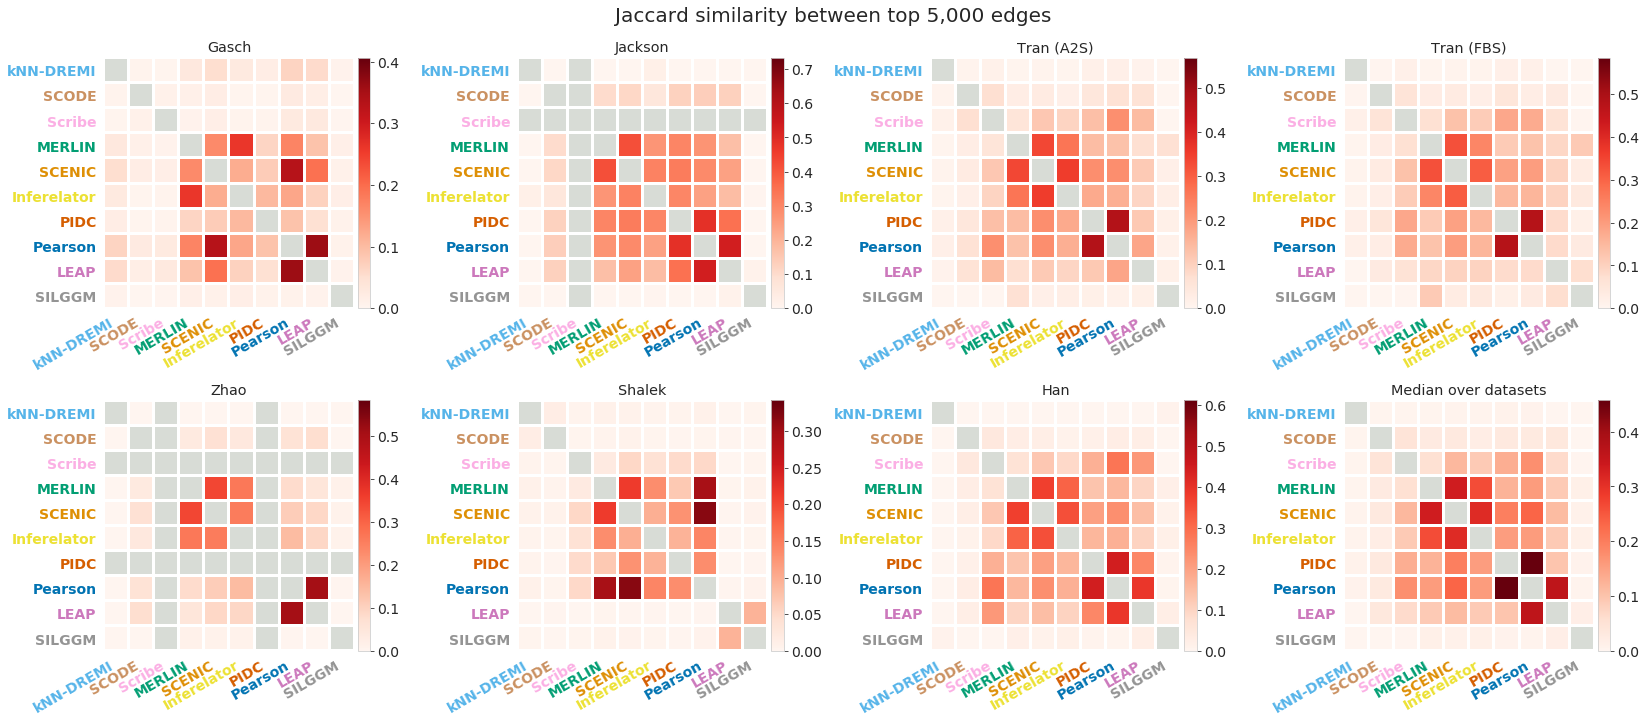

In [20]:
metric = 'jaccard'
n_edges = 5000

fig, axes = plt.subplots(2, 4, figsize=(27, 12))

# Put average in final axis
avg = overlaps.loc[overlaps.k == n_edges].groupby(['algA', 'algB'])[metric].median().reset_index()
hmap = make_hmap(avg, metric)
hmap, median_order = order_hmap(hmap)

ax = axes.flat[-1]
plot_hmap(hmap, ax)
annotate_hmap(ax, "Median over datasets", median_order)

# with a panel for each dataset
for ax, dataset in zip(axes.flat, DATASETS):
    # Select the overlaps relevant to the current subplot
    dat = overlaps.loc[(overlaps.dataset == dataset) &
                       (overlaps.k == n_edges)]

    # Make the similarity matrix, order it, and plot it
    hmap = make_hmap(dat, metric)
    hmap, order = order_hmap(hmap, median_order)
    plot_hmap(hmap, ax, vmax=vmaxes[dataset])
    annotate_hmap(ax, format_did(dataset), order)

# plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
fig.suptitle('Jaccard similarity between top {0:,} edges'.format(n_edges), fontsize=20)

# And save
fname = 'fig4_main.eps'
plt.savefig(os.path.join(OUTDIR, fname), bbox_inches='tight', format = "eps")

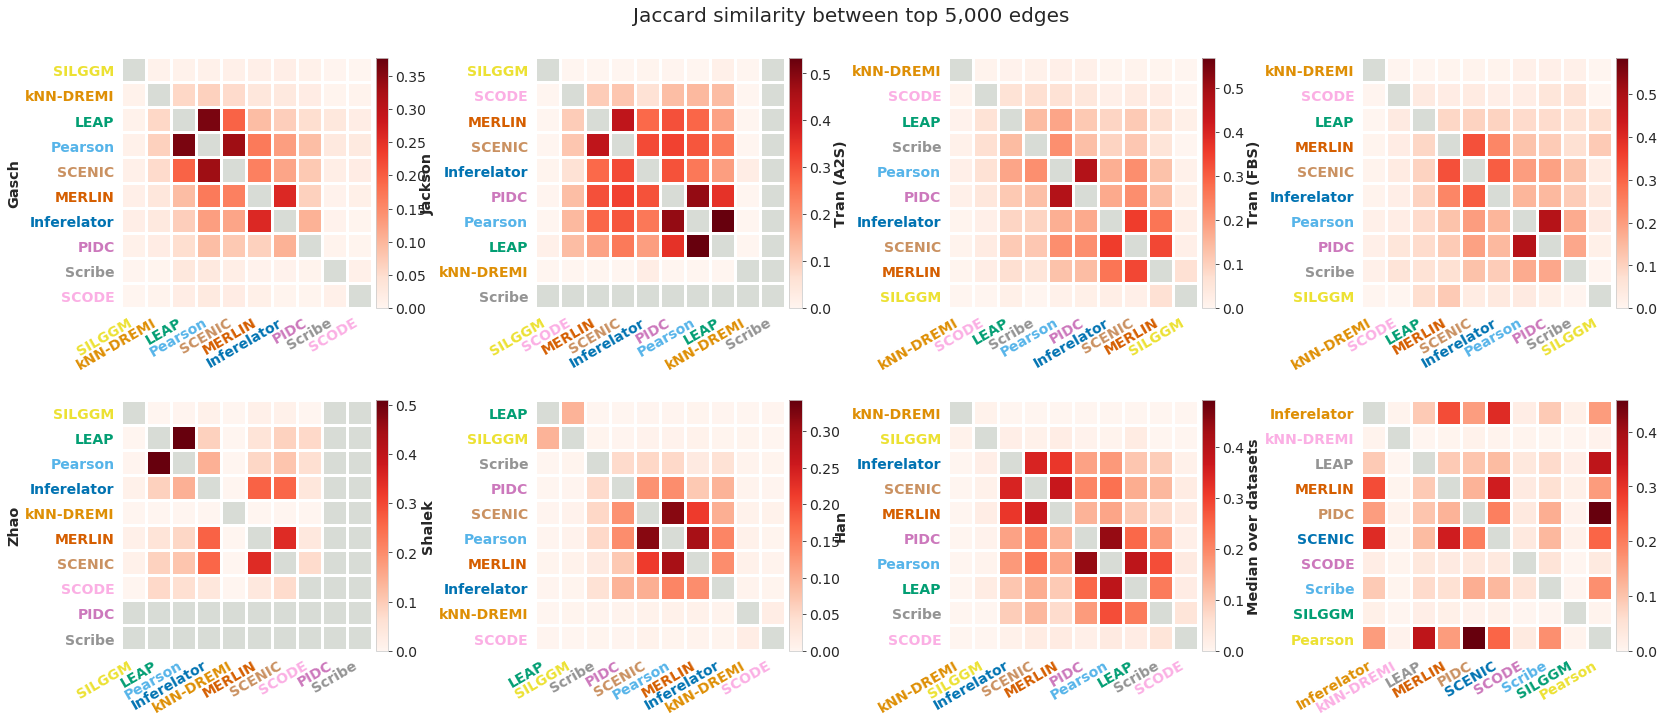

In [43]:
metric = 'jaccard'
n_edges = 5000

fig, axes = plt.subplots(2, 4, figsize=(27, 12))

# Put average in final axis
avg = overlaps.loc[overlaps.k == n_edges].groupby(['algA', 'algB'])[metric].median().reset_index()
hmap = make_hmap(avg, metric)
#hmap, median_order = order_hmap(hmap)

ax = axes.flat[-1]
plot_hmap(hmap, ax)
annotate_hmap(ax, "Median over datasets", median_order)

# with a panel for each dataset
for ax, dataset in zip(axes.flat, DATASETS):
    # Select the overlaps relevant to the current subplot
    dat = overlaps.loc[(overlaps.dataset == dataset) &
                       (overlaps.k == n_edges)]

    # Make the similarity matrix, order it, and plot it
    hmap = make_hmap(dat, metric)
    hmap, order = order_hmap(hmap, optimal_orders[dataset])
    plot_hmap(hmap, ax, vmax=vmaxes[dataset])
    annotate_hmap(ax, format_did(dataset), order)

# plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
fig.suptitle('Jaccard similarity between top {0:,} edges'.format(n_edges), fontsize=20)

# And save
fname = 'fig4_main.pdf'
plt.savefig(os.path.join(OUTDIR, fname), bbox_inches='tight')

# This block was to illustrat how the ax iterator works

Here
AxesSubplot(0.125,0.536818;0.168478x0.343182)
AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Here
AxesSubplot(0.125,0.125;0.168478x0.343182)
AxesSubplot(0.327174,0.125;0.168478x0.343182)


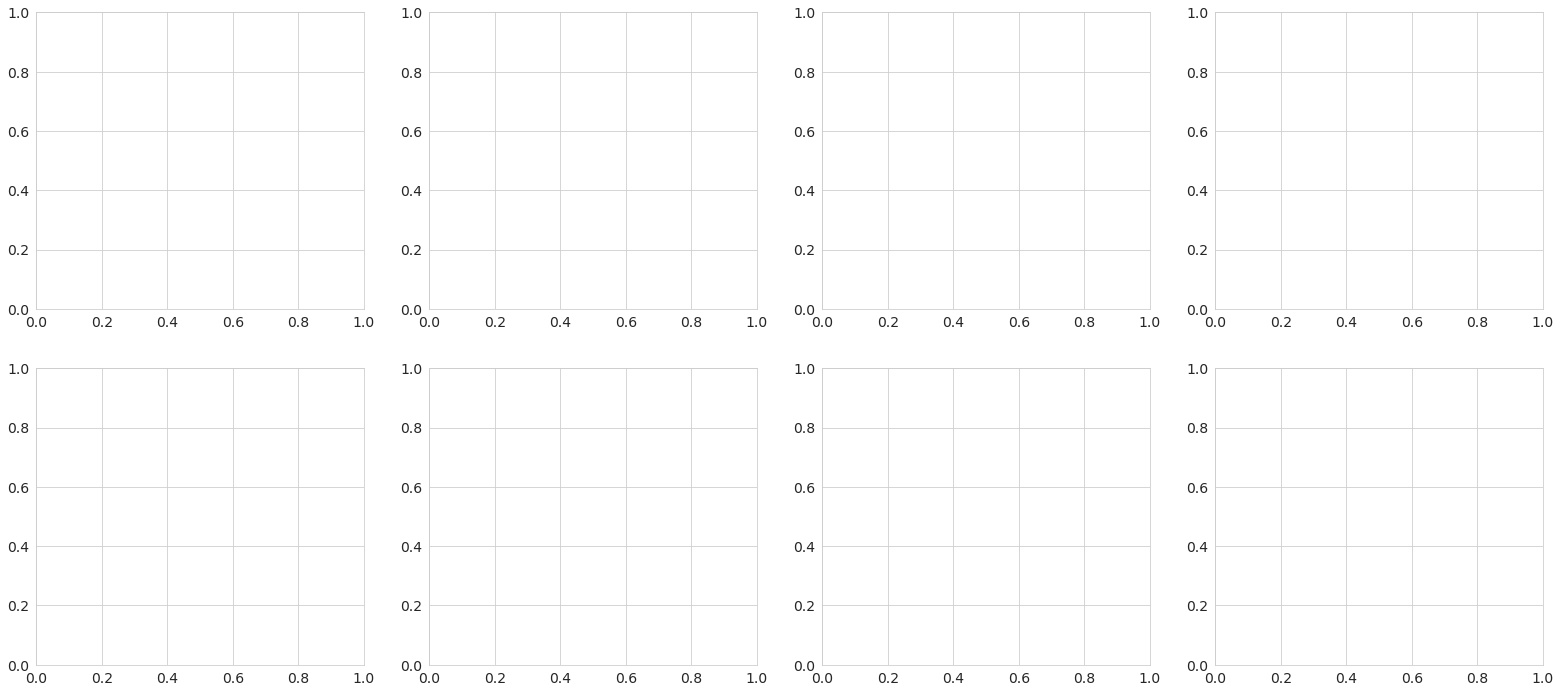

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(27, 12))
for ax in axes:
    print("Here")
    print(ax[0])
    print(ax[1])

# Below is the block which generates the final figure

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  del sys.path[0]


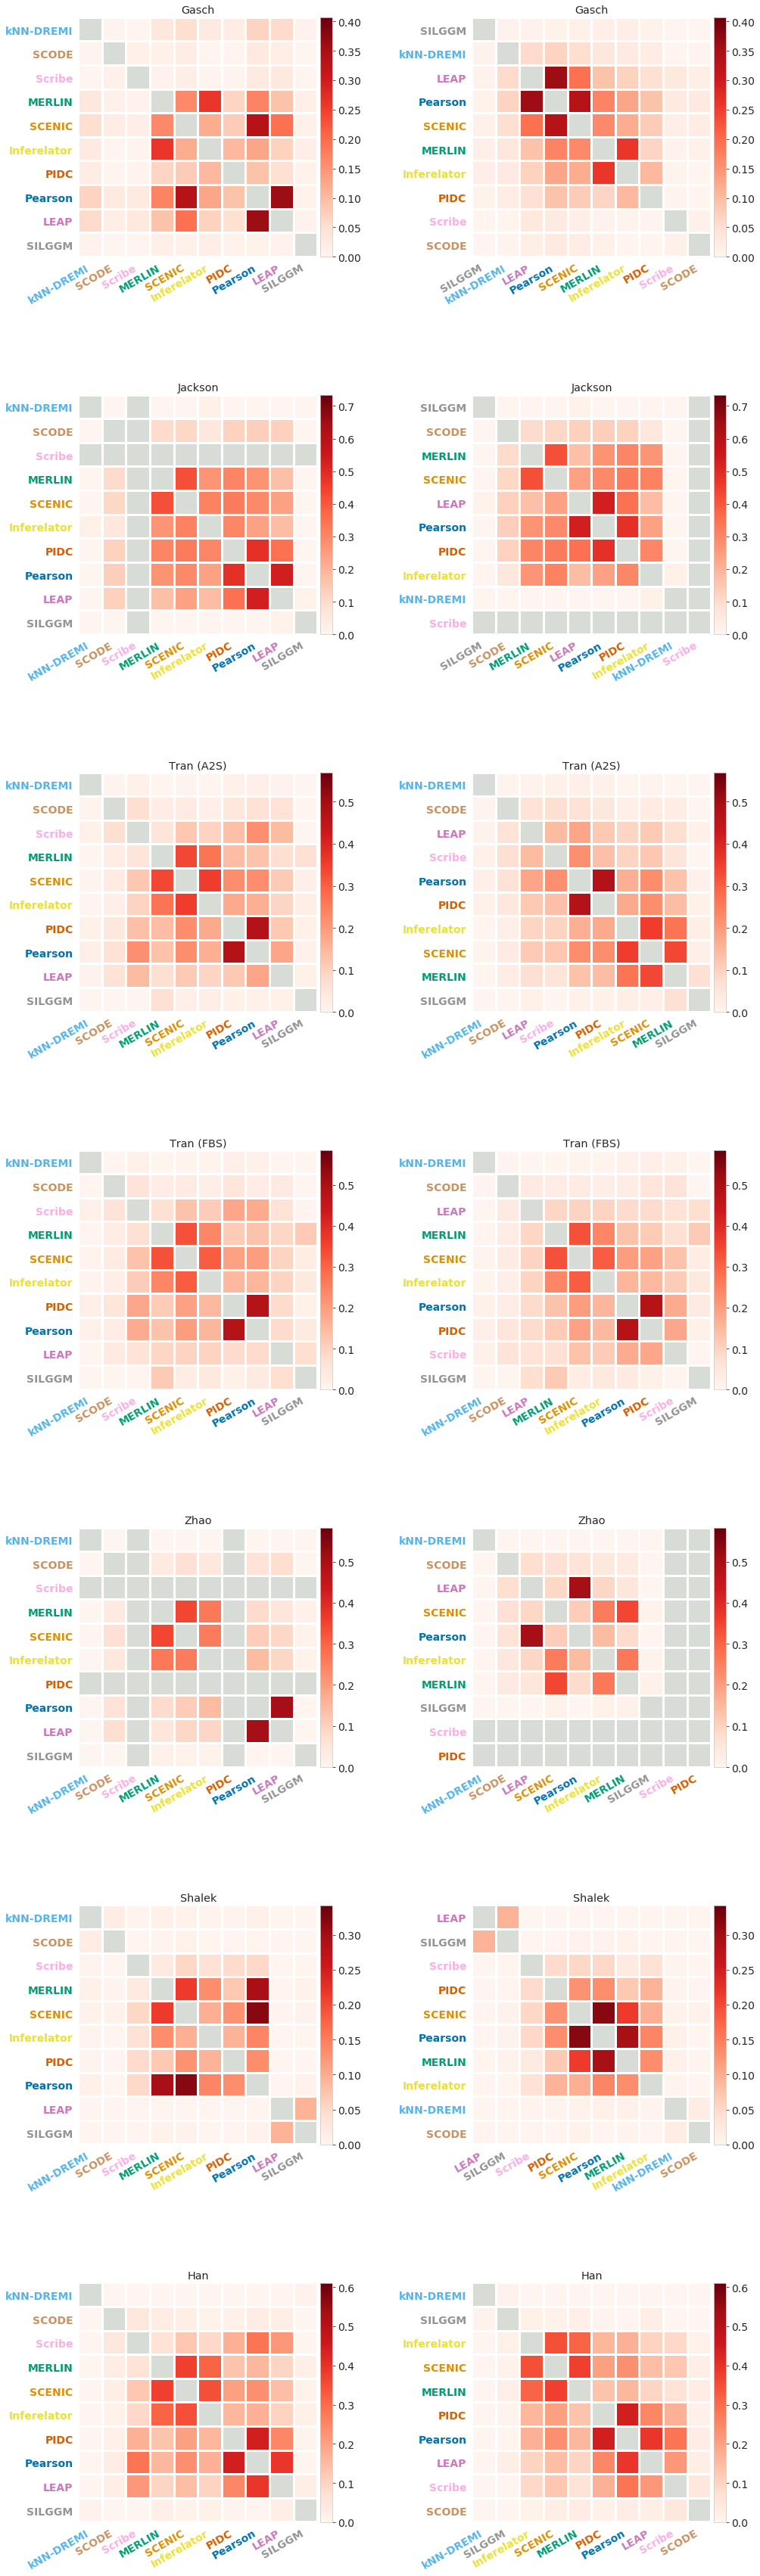

In [21]:
metric = 'jaccard'
n_edges = 5000

fig, axes = plt.subplots(7, 2, figsize=(14, 50))

# Put average in final axis
# avg = overlaps.loc[overlaps.k == n_edges].groupby(['algA', 'algB'])[metric].median().reset_index()
# hmap = make_hmap(avg, metric)
# hmap, median_order = order_hmap(hmap)

# ax = axes.flat[-1]
# plot_hmap(hmap, ax)
# annotate_hmap(ax, "Median over datasets", median_order)

# with a panel for each dataset
for ax, dataset in zip(axes, DATASETS):
    # Select the overlaps relevant to the current subplot
    dat = overlaps.loc[(overlaps.dataset == dataset) &
                       (overlaps.k == n_edges)]

    # Make the similarity matrix, order it, and plot it
    hmap = make_hmap(dat, metric)
    hmap, order = order_hmap(hmap, median_order)
    plot_hmap(hmap, ax[0], vmax=vmaxes[dataset])
    annotate_hmap(ax[0], format_did(dataset), order)
    hmap = make_hmap(dat, metric)
    hmap_o, order_o = order_hmap(hmap, optimal_orders[dataset])
    plot_hmap(hmap_o, ax[1], vmax=vmaxes[dataset])
    annotate_hmap(ax[1], format_did(dataset), order_o)


plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
#plt.subplots_adjust(top= 1.5, hspace=-0.1, wspace=1)
#fig.suptitle("Common ordering                           Perdataset", fontweight = 'bold', fontsize = 'x-large')

# And save
fname = 'fig.6_main.pdf'
plt.savefig(os.path.join(OUTDIR, fname), bbox_inches='tight', dpi = 300)

In [21]:

avg.pivot_table(index='algA', columns='algB', values=metric).reindex(index = ALGORITHMS,columns = ALGORITHMS)





algB         Inferelator  kNN-DREMI      LEAP    MERLIN      PIDC    SCENIC  \
algA                                                                          
Inferelator          NaN   0.006442  0.089802  0.263346  0.155622  0.311562   
kNN-DREMI            NaN        NaN  0.000801  0.004823  0.010183  0.007049   
LEAP                 NaN        NaN       NaN  0.092180  0.092113  0.113834   
MERLIN               NaN        NaN       NaN       NaN  0.124900  0.335113   
PIDC                 NaN        NaN       NaN       NaN       NaN  0.199138   
SCENIC               NaN        NaN       NaN       NaN       NaN       NaN   
SCODE                NaN        NaN       NaN       NaN       NaN       NaN   
Scribe               NaN        NaN       NaN       NaN       NaN       NaN   
SILGGM               NaN        NaN       NaN       NaN       NaN       NaN   
Pearson              NaN        NaN       NaN       NaN  0.456876  0.234416   

algB            SCODE    Scribe    SILGGM   Pearson  
algA                                                 
Inferelator  0.016902  0.092538  0.017763  0.159896  
kNN-DREMI    0.003714  0.005025  0.001101  0.008369  
LEAP         0.037237  0.065871  0.018953  0.181056  
MERLIN       0.029124  0.055409  0.014713  0.157273  
PIDC         0.032908  0.133401  0.008827       NaN  
SCENIC       0.033378  0.119194  0.012146       NaN  
SCODE             NaN  0.047340  0.000000       NaN  
Scribe            NaN       NaN  0.002808       NaN  
SILGGM            NaN       NaN       NaN       NaN  
Pearson      0.030822  0.175088  0.006948       NaN

# Supp

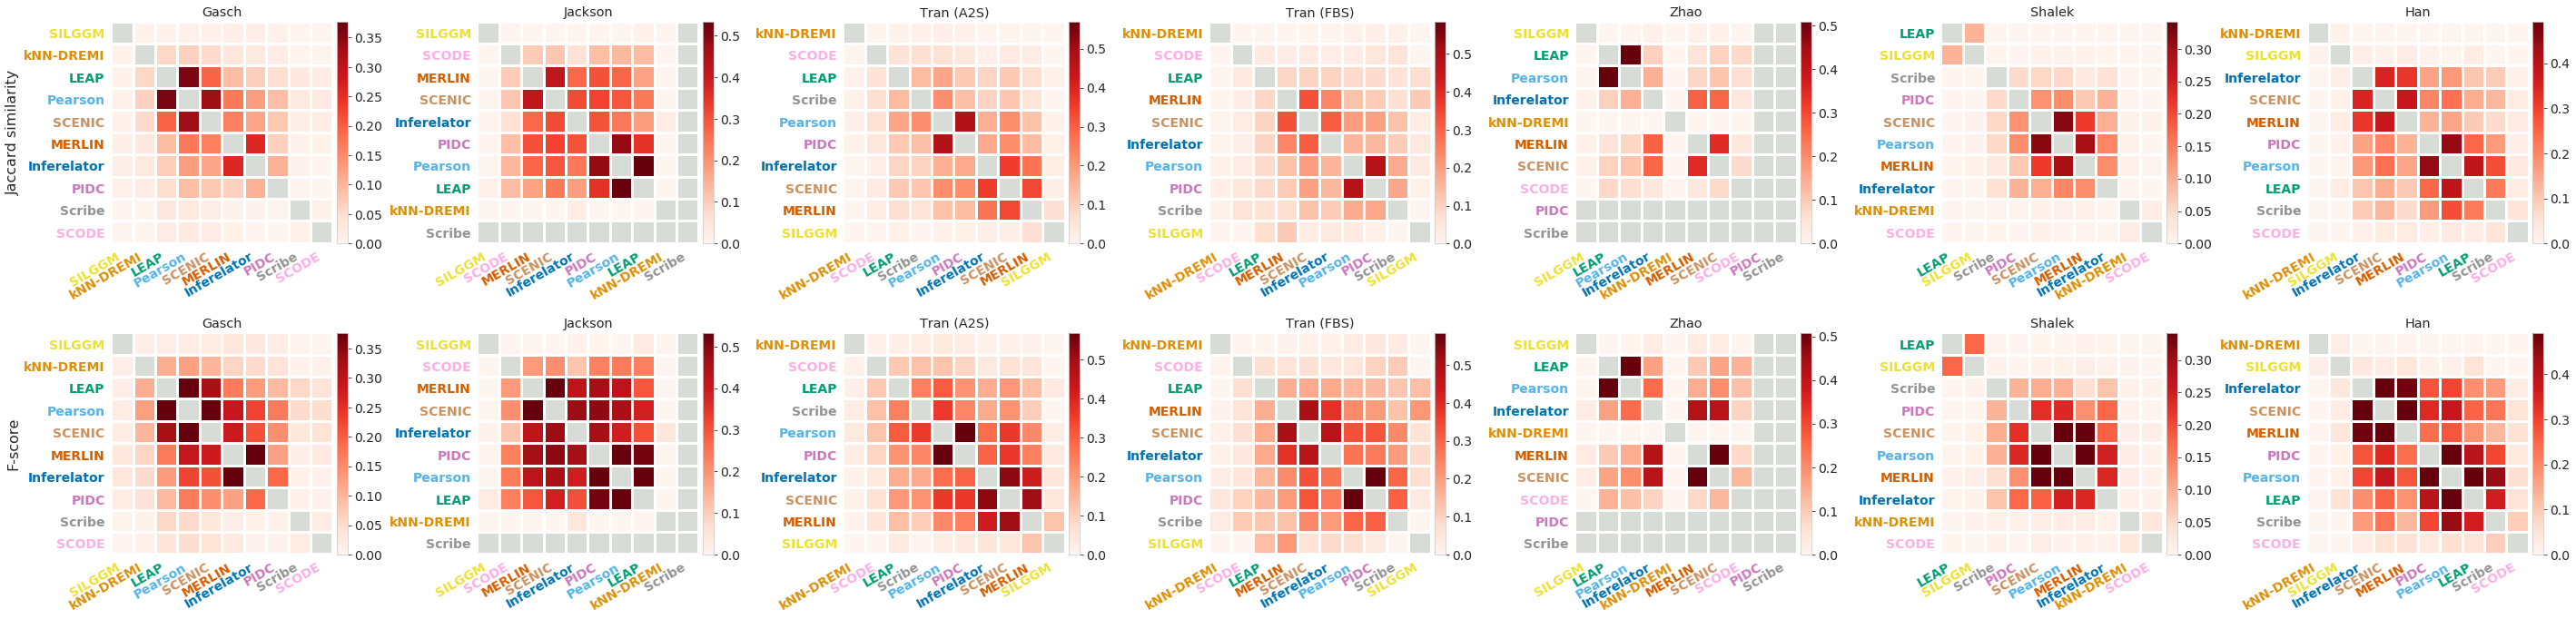

In [28]:
metrics = ['jaccard', 'fscore']
n_edges = 5000

fig, axes = plt.subplots(2, 7, figsize=(48, 12))

# with a panel for each dataset
for axrow, metric in zip(axes, metrics):
    for ax, dataset in zip(axrow, DATASETS):
        # Select the overlaps relevant to the current subplot
        dat = overlaps.loc[(overlaps.dataset == dataset) &
                           (overlaps.k == n_edges)]

        # Make the similarity matrix, order it, and plot it
        hmap = make_hmap(dat, metric)
        hmap, order = order_hmap(hmap, optimal_orders[dataset])
        plot_hmap(hmap, ax, vmax=vmaxes[dataset])
        annotate_hmap(ax, format_did(dataset), order)
        
        if dataset.startswith('gasch'):
            if metric == 'fscore':
                ax.set_ylabel('F-score', fontsize=16)
            else:
                ax.set_ylabel('Jaccard similarity', fontsize=16)
        
# plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
# fig.suptitle('Jaccard similarity between top edges'.format(n_edges), fontsize=20)

# And save
fname = 'fig4s4_jaccard_fscore_comparison.pdf'.format(**locals())
plt.savefig(os.path.join(SUPPOUTDIR, fname), bbox_inches='tight')

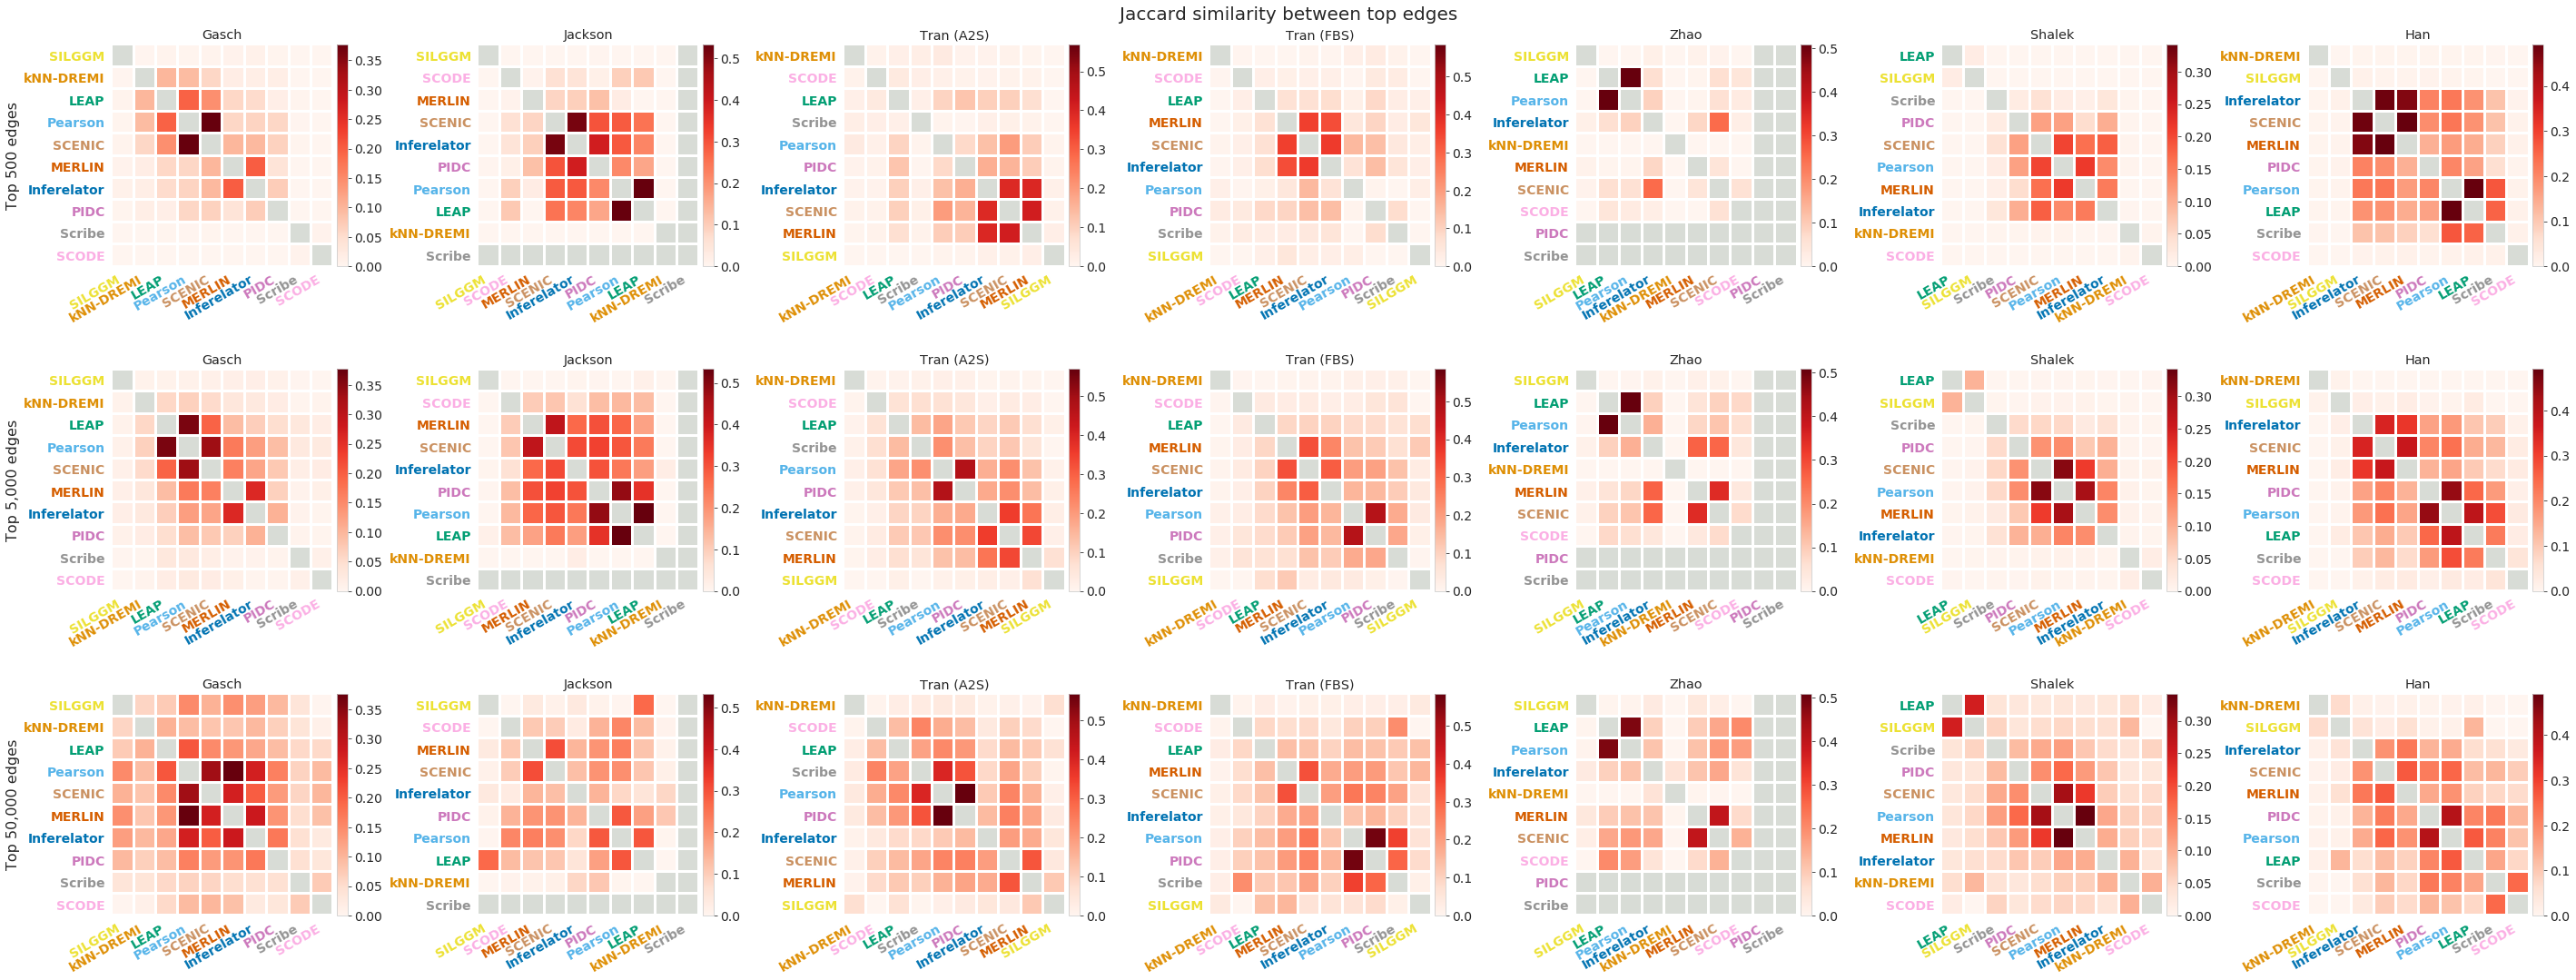

In [39]:
metric = 'jaccard'
n_list = [500, 5000, 50000]

fig, axes = plt.subplots(3, 7, figsize=(48, 18))

# with a panel for each dataset
for axrow, n_edges in zip(axes, n_list):
    for ax, dataset in zip(axrow, DATASETS):
        # Select the overlaps relevant to the current subplot
        dat = overlaps.loc[(overlaps.dataset == dataset) &
                           (overlaps.k == n_edges)]

        # Make the similarity matrix, order it, and plot it
        hmap = make_hmap(dat, metric)
        hmap, order = order_hmap(hmap, optimal_orders[dataset])
        plot_hmap(hmap, ax, vmax=vmaxes[dataset])
        annotate_hmap(ax, format_did(dataset), order)
        
        if dataset.startswith('gasch'):
            ax.set_ylabel('Top {:,} edges'.format(n_edges), fontsize=16)
        
# plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
fig.suptitle('Jaccard similarity between top edges'.format(n_edges), fontsize=20)

# And save
fname = 'fig4s1_jaccard_by_edge_count.pdf'.format(**locals())
plt.savefig(os.path.join(SUPPOUTDIR, fname), bbox_inches='tight')

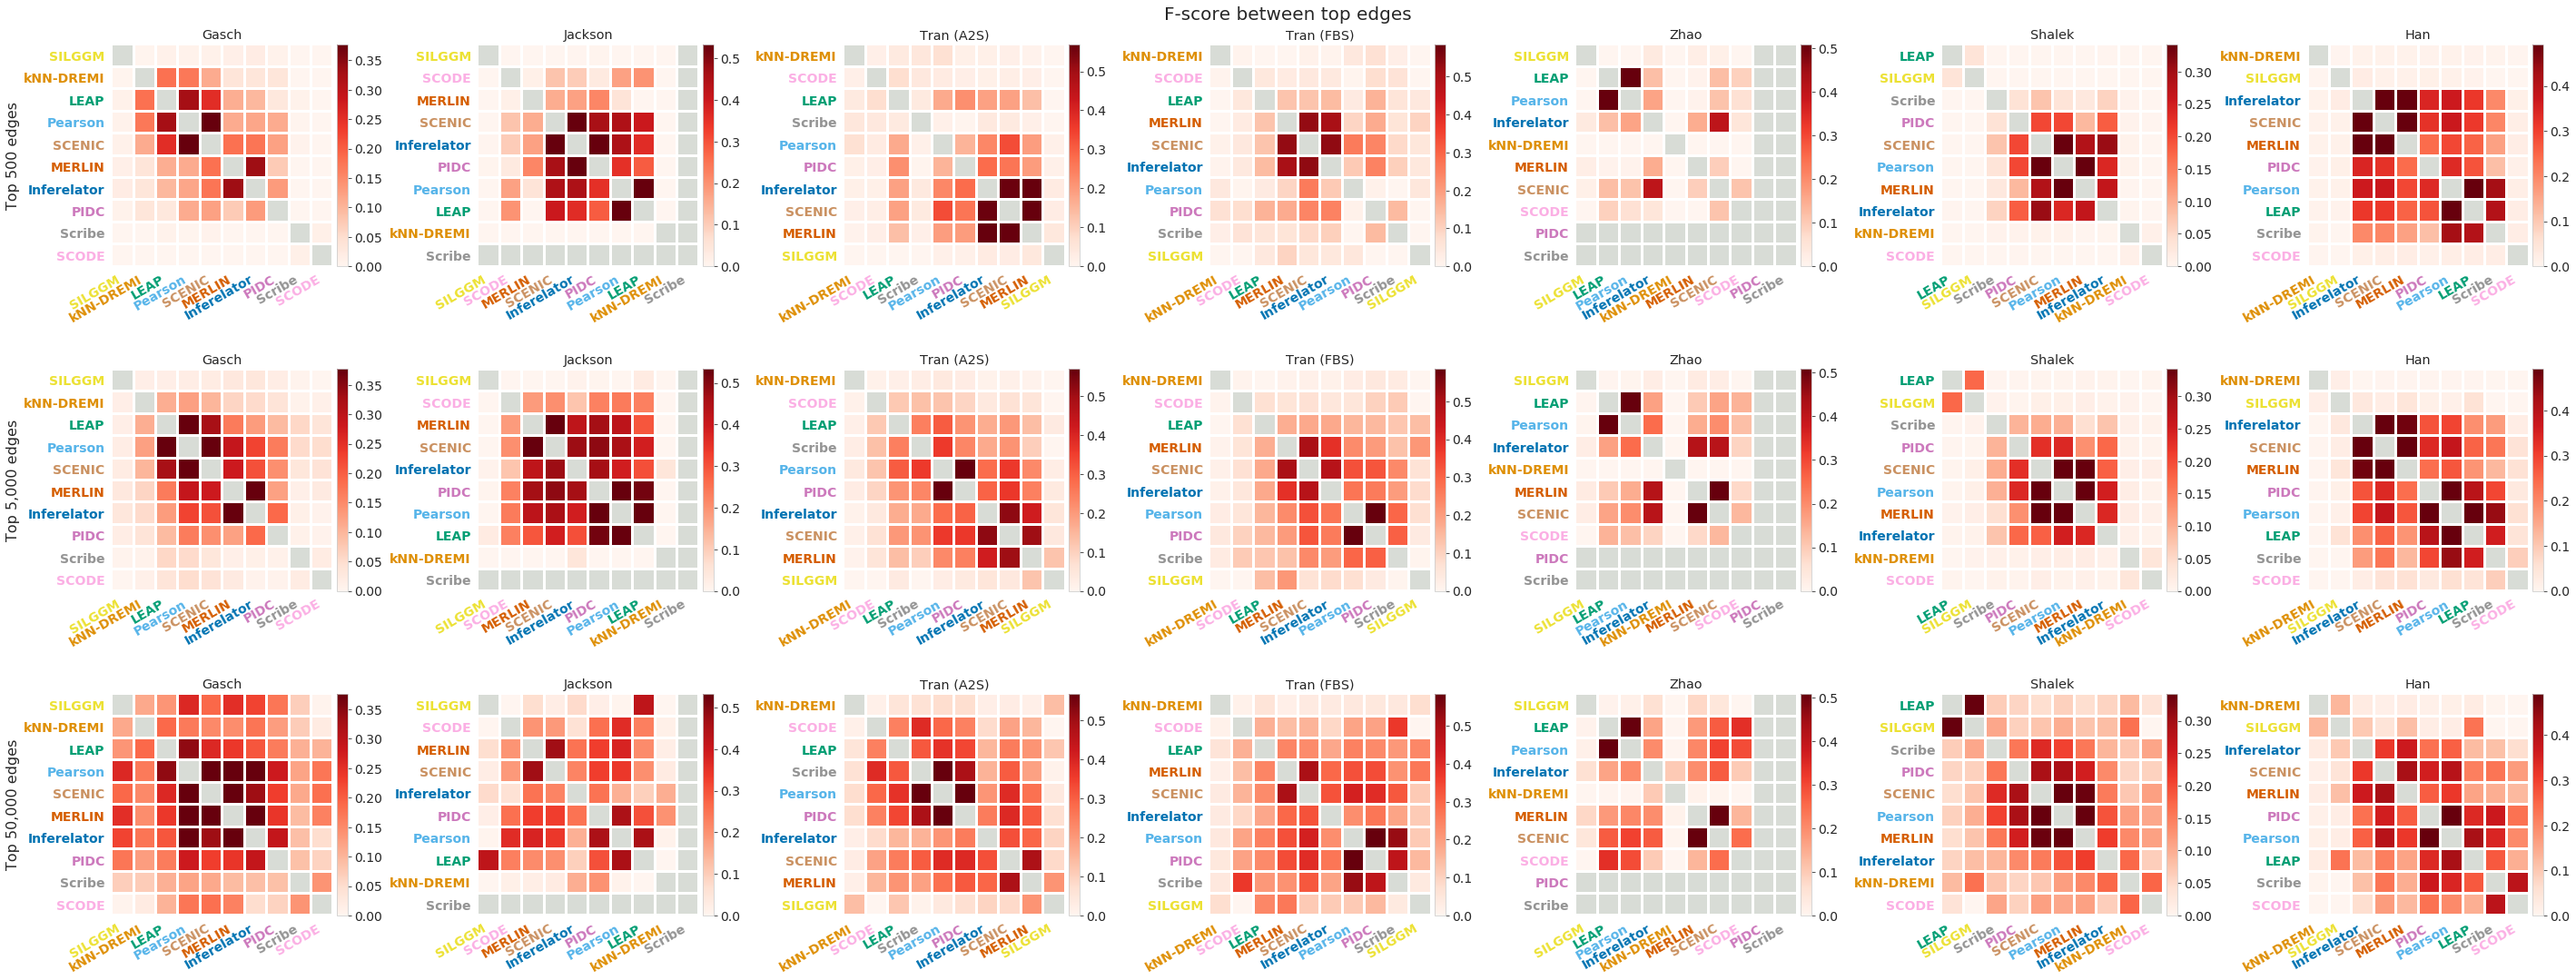

In [40]:
metric = 'fscore'
n_list = [500, 5000, 50000]

fig, axes = plt.subplots(3, 7, figsize=(48, 18))

# with a panel for each dataset
for axrow, n_edges in zip(axes, n_list):
    for ax, dataset in zip(axrow, DATASETS):
        # Select the overlaps relevant to the current subplot
        dat = overlaps.loc[(overlaps.dataset == dataset) &
                           (overlaps.k == n_edges)]

        # Make the similarity matrix, order it, and plot it
        hmap = make_hmap(dat, metric)
        hmap, order = order_hmap(hmap, optimal_orders[dataset])
        plot_hmap(hmap, ax, vmax=vmaxes[dataset])
        annotate_hmap(ax, format_did(dataset), order)
        
        if dataset.startswith('gasch'):
            ax.set_ylabel('Top {:,} edges'.format(n_edges), fontsize=16)
        
# plt.tight_layout()

# Add title
plt.subplots_adjust(top=1.03, hspace=-0.22, wspace=0.55)
fig.suptitle('F-score between top edges'.format(n_edges), fontsize=20)

# And save
fname = 'fig4s2_fscore_by_edge_count.pdf'.format(**locals())
plt.savefig(os.path.join(SUPPOUTDIR, fname), bbox_inches='tight')